In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes as geoaxes
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as mcolors
%matplotlib inline
import netCDF4
import xarray as xr


In [149]:
earthquakes_data = pd.read_csv('usgs_earthquakes.csv')#读取数据
earthquakes_data
Top50earthquake=earthquakes_data.sort_values("mag", ascending=False)[0:50] #按震级大小排序，选前50
Top50earthquake.reset_index()#重新设置序号

,index,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
1,50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2,36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
3,33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
4,31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
5,33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
6,95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
7,31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
8,34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
9,106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


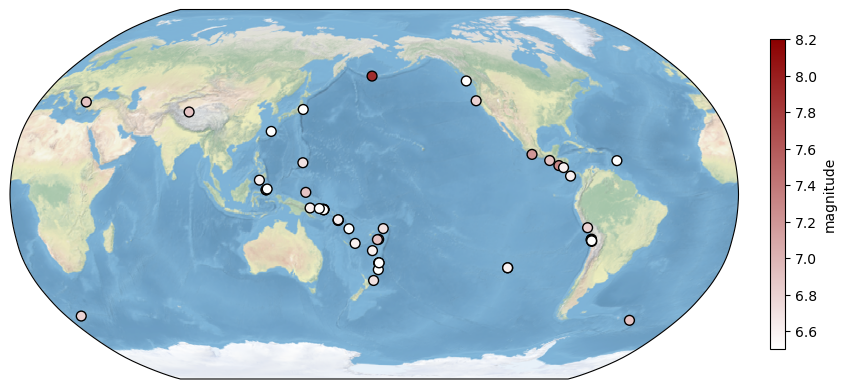

In [153]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Set Robinson projection style
proj = ccrs.Robinson(central_longitude=180)      #设置中央经线为180°，投影为Robinson

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)


# Add features to axes using cartopy.feature (cfeature)
ax.stock_img()              #在坐标轴上添加低分辨率的自然地球背景图像，从 MAP WITH CARTOPY 找的

# 设定颜色映射范围 (最小6.5，最大8.2) 和 colormap
norm = mcolors.Normalize(vmin=6.5, vmax=8.2)
# 创建一个从白色到黑红色的线性渐变 colormap，
cmap = mcolors.LinearSegmentedColormap.from_list("white_to_red", ["white", "darkred"])
# 绘制散点图
scatter=ax.scatter(
    Top50earthquake['longitude'], 
    Top50earthquake['latitude'], 
    c=Top50earthquake['mag'],            # 使用震级数据设置颜色
    cmap=cmap,                           # 指定颜色映射
    norm=norm,                           # 正常化震级数据到颜色范围
    edgecolor='black',                   # 点的边缘颜色
    s=50,                                # 点的大小
    transform=ccrs.PlateCarree())         # 设置投影)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('magnitude')


In [223]:
ds.XCO2.attrs

{'units': 'mol CO2/mol dry',
 'long_name': 'Assimilated dry-air column average CO2 daily mean',
 'cell_methods': 'time: mean'}

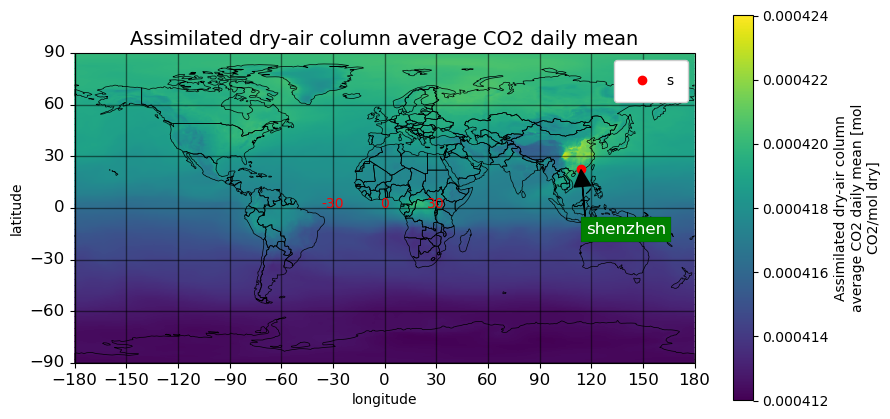

In [5]:
#第2题
#2.1

# Open a netCDF4 file
ds = xr.open_dataset("oco2_GEOS_L3CO2_month_202202_B10206Ar.nc4", engine="netcdf4")  #2022年2.15干空气CO2平均柱浓度

# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Set Robinson projection style
proj = ccrs.PlateCarree()      

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Plot the surface temperature
ds.XCO2.plot(ax=ax, transform=ccrs.PlateCarree(),    #添加数据
         vmin=0.000412, vmax=0.000424, cbar_kwargs={'shrink': 1})         #根据浓度不同颜色不同，colorbar

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',            #添加国界线，feature
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)     #网格

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

plt.xlabel('longitude', fontsize=10)                                              #label
plt.ylabel('latitude', fontsize=10)
# Adjust xy axis ticks
plt.xticks(ticks=np.arange(-180, 181, 30), fontsize=12, rotation=0, ha='center', va='top')  #tick
plt.yticks(ticks=np.arange(-90, 91, 30), fontsize=12, rotation=0, ha='right', va='center')
plt.title('Assimilated dry-air column average CO2 daily mean', fontsize=14)            #title

shenzhen=plt.plot(114.06,22.54,'ro', transform=ccrs.PlateCarree())       #shenzhen
plt.legend(shenzhen,       # plot items
           'shenzhen',       # legends
           frameon=True,                   # legend border
           framealpha=1,                   # transparency of border
           shadow=False,                   # shadow on
           borderpad=1,)                    # thickness of border
# Annotate with Arrow Props and bbox
plt.annotate('shenzhen', xy=(114.06,22.54), xytext=(140,-15),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),                            #annotate
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
for index in [-30, 0, 30]:                                                                 #text
    plt.text(index, 0, str(index), 
             transform=plt.gca().transData, horizontalalignment='center', color='red')  

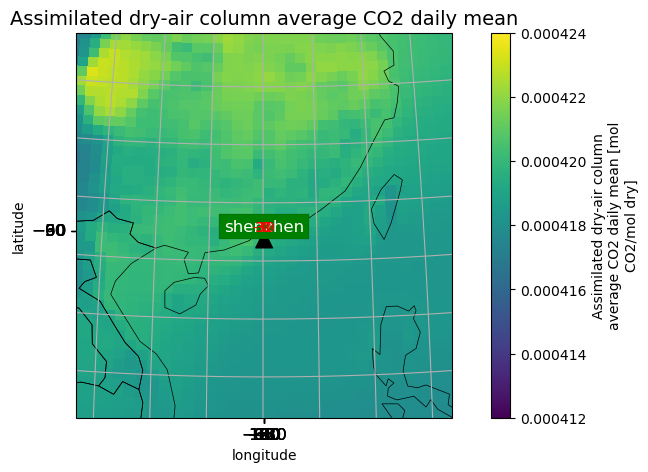

In [3]:
#2.2
# Open a netCDF4 file
ds = xr.open_dataset("oco2_GEOS_L3CO2_month_202202_B10206Ar.nc4", engine="netcdf4")  #2022年2.15干空气CO2平均柱浓度
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)
# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)


# Plot the surface temperature
ds.XCO2.plot(ax=ax, transform=ccrs.PlateCarree(),    #添加数据
         vmin=0.000412, vmax=0.000424, cbar_kwargs={'shrink': 1})         #根据浓度不同颜色不同，colorbar

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',            #添加国界线，feature
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

ax.gridlines()                                                                 #网格
plt.xlabel('longitude', fontsize=10)                                              #label
plt.ylabel('latitude', fontsize=10)
# Adjust xy axis ticks
plt.xticks(ticks=np.arange(-180, 181, 30), fontsize=12, rotation=0, ha='center', va='top')  #tick ,不知道为何数字重叠在一起
plt.yticks(ticks=np.arange(-90, 91, 30), fontsize=12, rotation=0, ha='right', va='center')
plt.title('Assimilated dry-air column average CO2 daily mean', fontsize=14)            #title

shenzhen=plt.plot(114.06,22.54,'ro', transform=proj)       #shenzhen

# Annotate with Arrow Props and bbox
plt.annotate('shenzhen', xy=(114.06,22.54), xytext=(140,-15),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),                            #annotate
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
for index in [-30, 0, 30]:                                                                 #text
    plt.text(index, 0, str(index), 
             transform=plt.gca().transData, horizontalalignment='center', color='red')  